
# <div style="text-align: center; color: cyan">Convolution</div>

## <div style="text-align: center; color: lime">Setup</div>

In [1]:
import os

os.environ["KERAS_BACKEND"] = "torch"

## <div style="text-align: center; color: lime">Imports</div>

In [2]:
from pathlib import Path

from matplotlib import pyplot as plt

import torch
from torch.utils.data import random_split, DataLoader

from torchvision.datasets import ImageFolder
from torchvision import transforms

from keras import Sequential
from keras.layers import Input, Conv2D, MaxPool2D, Dense, Flatten, Dropout, Permute
from keras.callbacks import TensorBoard

import kagglehub

import datetime

## <div style="text-align: center; color: lime">Load the data</div>

In [3]:
path = kagglehub.dataset_download("balabaskar/tom-and-jerry-image-classification")

data_path = Path(path) / "tom_and_jerry/tom_and_jerry"

trs = transforms.Compose(
    [
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
    ]
)

all_data = ImageFolder(data_path, transform=trs)

g1 = torch.Generator().manual_seed(20)
train_data, val_data, test_data = random_split(all_data, [0.7, 0.2, 0.1], g1)

train_loader = DataLoader(train_data, batch_size=12, shuffle=True)
val_loader = DataLoader(val_data, batch_size=12, shuffle=False)
test_loader = DataLoader(test_data, batch_size=12, shuffle=False)

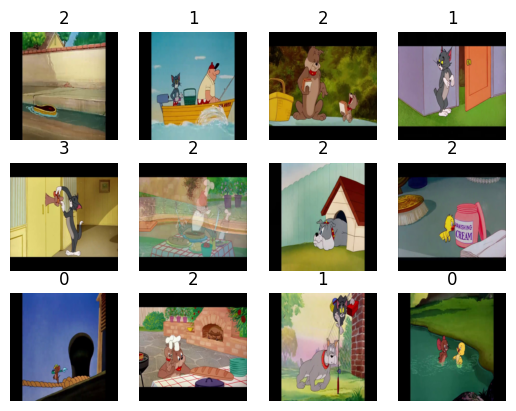

In [4]:
fig, axes = plt.subplots(3, 4)

axes_ravel = axes.ravel()

for images, labels in train_loader:
    for i, (image, label) in enumerate(zip(images, labels)):
        axes_ravel[i].imshow(transforms.ToPILImage()(image))
        axes_ravel[i].set_axis_off()
        axes_ravel[i].set_title(f"{label}")
    break

## <div style="text-align: center; color: lime">Define AlexNet Model</div>

In [10]:
model = Sequential(
    [
        Input((3, 224, 224)),
        Permute((2, 3, 1)),
        Conv2D(
            96, (11, 11), strides=4, padding="valid", activation="relu"
        ),
        MaxPool2D((3, 3), strides=2),
        Conv2D(256, (5, 5), padding="same", activation="relu"),
        MaxPool2D((3, 3), strides=2),
        Conv2D(384, (3, 3), padding="same", activation="relu"),
        Conv2D(384, (3, 3), padding="same", activation="relu"),
        Conv2D(256, (3, 3), padding="same", activation="relu"),
        MaxPool2D((3, 3), strides=2),
        Flatten(),
        Dense(4096, activation="relu"),
        Dropout(0.5),
        Dense(4096, activation="relu"),
        Dropout(0.5),
        Dense(1000, activation="softmax"),
    ]
)

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

print(model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ permute_1 (Permute)             │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 54, 54, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 26, 26, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 384)    │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 12, 12, 384)    │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 12, 12, 256)    │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4096)           │    26,218,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,844,008 (193.95 MB)

 Trainable params: 50,844,008 (193.95 MB)

 Non-trainable params: 0 (0.00 B)

None


## <div style="text-align: center; color: lime">Train the model</div>

In [11]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir)

history = model.fit(
    train_loader,
    epochs=5,
    validation_data=val_loader,
    callbacks=[tensorboard_callback],
)

Epoch 1/5
320/320 ━━━━━━━━━━━━━━━━━━━━ 53s 166ms/step - accuracy: 0.3220 - loss: 1.5047 - val_accuracy: 0.2828 - val_loss: 1.3600
Epoch 2/5
320/320 ━━━━━━━━━━━━━━━━━━━━ 53s 164ms/step - accuracy: 0.3293 - loss: 1.3640 - val_accuracy: 0.3449 - val_loss: 1.3507
Epoch 3/5
320/320 ━━━━━━━━━━━━━━━━━━━━ 53s 165ms/step - accuracy: 0.3330 - loss: 1.3700 - val_accuracy: 0.3422 - val_loss: 1.4076
Epoch 4/5
320/320 ━━━━━━━━━━━━━━━━━━━━ 52s 164ms/step - accuracy: 0.3322 - loss: 1.3695 - val_accuracy: 0.3422 - val_loss: 1.3644
Epoch 5/5
320/320 ━━━━━━━━━━━━━━━━━━━━ 52s 163ms/step - accuracy: 0.3361 - loss: 1.3493 - val_accuracy: 0.3422 - val_loss: 1.3605


## <div style="text-align: center; color: lime">Evalute the model</div>

In [12]:
loss, accuracy = model.evaluate(test_loader)

print("loss:", loss)
print("accuracy:", accuracy)


46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.3638 - loss: 1.3075
loss: 1.3074544668197632
accuracy: 0.36380255222320557


## <div style="text-align: center; color: lime">Plot the training procedure</div>

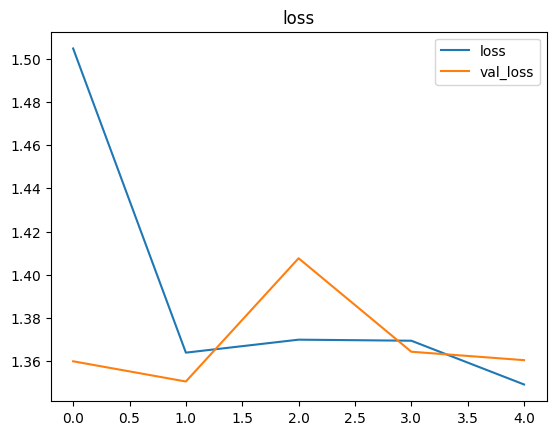

In [13]:
plt.figure()
plt.title("loss")
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(["loss", "val_loss"])

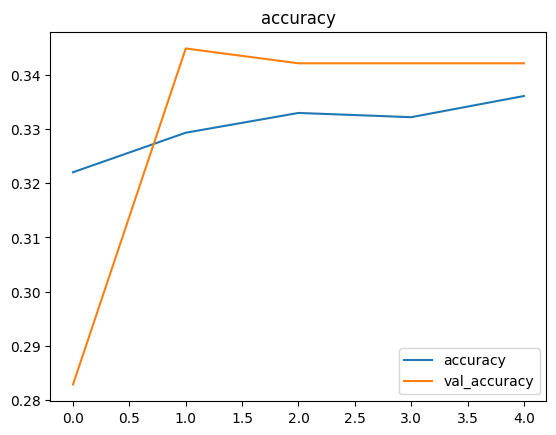

In [14]:
plt.figure()
plt.title("accuracy")
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.legend(["accuracy", "val_accuracy"])

<p style="text-align: center; font-family: "Trebuchet MS", sans-serif; color: #888; font-size: 0.9em; margin-top: 2em; border-top: 1px solid #ccc; padding-top: 0.5em;">
    @LiterallyTheOne — PhD Candidate in Artificial Intelligence
</p>

<div style="text-align: center">
<a style="margin: 1em" href="https://literallytheone.github.io">https://literallytheone.github.io</a>
</div>
